#Predicting Heart Disease using Machine Learning
This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification.

### Some steps we need to do
* Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.
* Model training - create model(s) to learn to predict a target variable based on other variables.
* Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.
* Model comparison - comparing several different models to find the best one.
* Model fine-tuning - once we've found a good model, how can we improve it?
* Feature importance - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* Cross-validation - if we do build a good model, can we be sure it will work on unseen data?

##**1. Problem definition**
In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

##**2. Data**
The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

##**3, Features**
* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
  * 0: Nothing to note
  * 1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
  * 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
  * 0: Upsloping: better heart rate with excercise (uncommon)
  * 1: Flatsloping: minimal change (typical healthy heart)
  * 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
  * 1,3: normal
  * 6: fixed defect: used to be defect but ok now
  * 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute

In [29]:
#Libraries for EDA and data visulaization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models for Scikit learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation.
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score

In [5]:
#loading data
df = pd.read_csv("heart-disease.csv")
print(df.head())
print(df.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
(303, 14)


##Questions.
* Question trying to solve
* what kind of data we have and do we we treat different type
* What's the missing data and how are we dealing with it.
* What are outliers and why should we care about them.
* how can we add, remove, transform features to get more from our data.

In [5]:
#Lets find out how many class of each there are (! for have heart disease and 0 for no heart disease.)
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

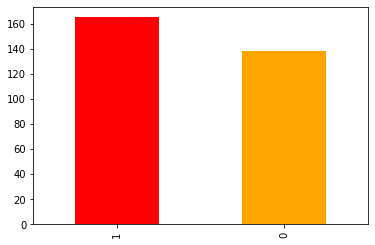

In [6]:
df["target"].value_counts().plot(kind ="bar", color =["red","orange"])

In [7]:
#Getting some info from our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#CHeck any null value.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##Finding patterns.

In [10]:
#heart disease frequency according to sex 1-male  0-female
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#comapre target column with sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

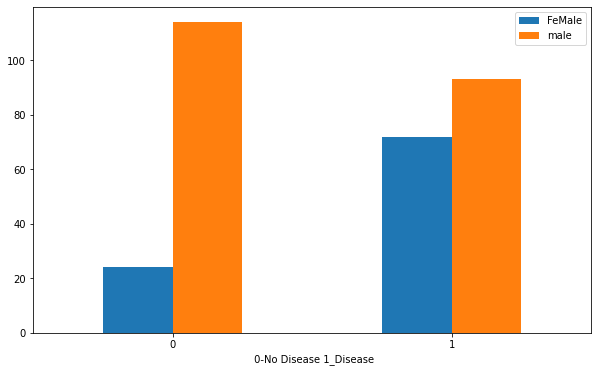

In [12]:
#create a visual of cross tab.
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6))
plt.xlabel(" 0-No Disease 1_Disease")
plt.legend(["FeMale", "male"])
plt.xticks(rotation= 0)

Text(0, 0.5, 'Maxm heart rate')

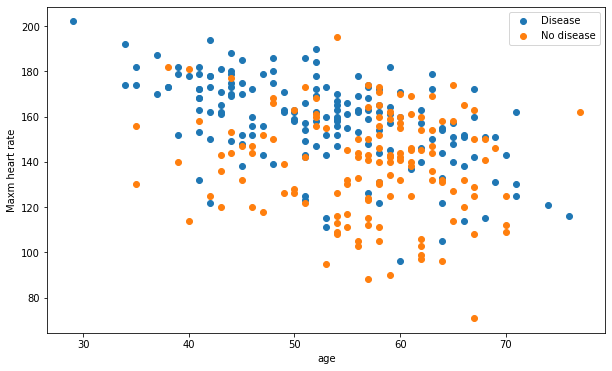

In [13]:
#using two independent variables with target and finding pattern.
plt.figure(figsize=(10,6))
#people with disease heart rate
plt.scatter(df["age"][df.target==1],
            df["thalach"][df.target == 1])
#No disease heart rate
plt.scatter(df["age"][df.target==0],
            df["thalach"][df.target == 0])
plt.legend(["Disease", "No disease"])
plt.xlabel("age")
plt.ylabel("Maxm heart rate")

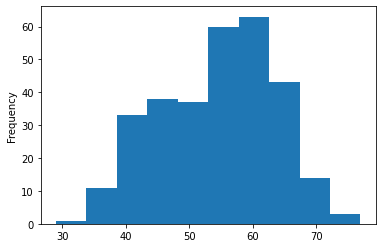

In [14]:
#plotting histogram for age
df.age.plot(kind="hist")

In [15]:
##3heart disease frequency per chest pain type
#0: Typical angina: chest pain related decrease blood supply to the heart
#1: Atypical angina: chest pain not related to heart
#2: Non-anginal pain: typically esophageal spasms (non heart related)
#3: Asymptomatic: chest pain not showing signs of disease
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0.5, 1.0, 'Heart disease vs chest pain categories')

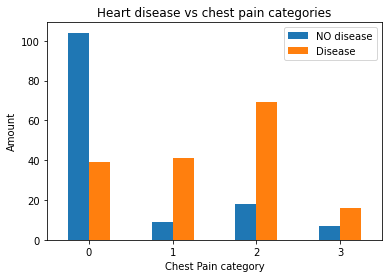

In [16]:
#make the chest pain cross tab viusal
pd.crosstab(df.cp,df.target).plot(kind = "bar")
plt.xticks(rotation = 0)
plt.legend(["NO disease", "Disease"])
plt.xlabel("Chest Pain category")
plt.ylabel("Amount")
plt.title("Heart disease vs chest pain categories")

In [17]:
##Building correlation.
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


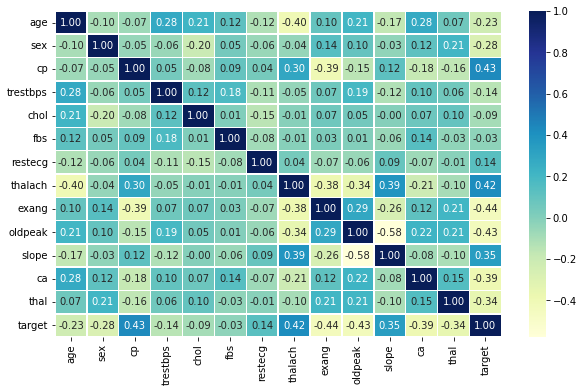

In [18]:
fig,ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(corr,
                 linewidths = 0.5,
                 annot = True,
                 fmt = ".2f",
                 cmap = "YlGnBu")

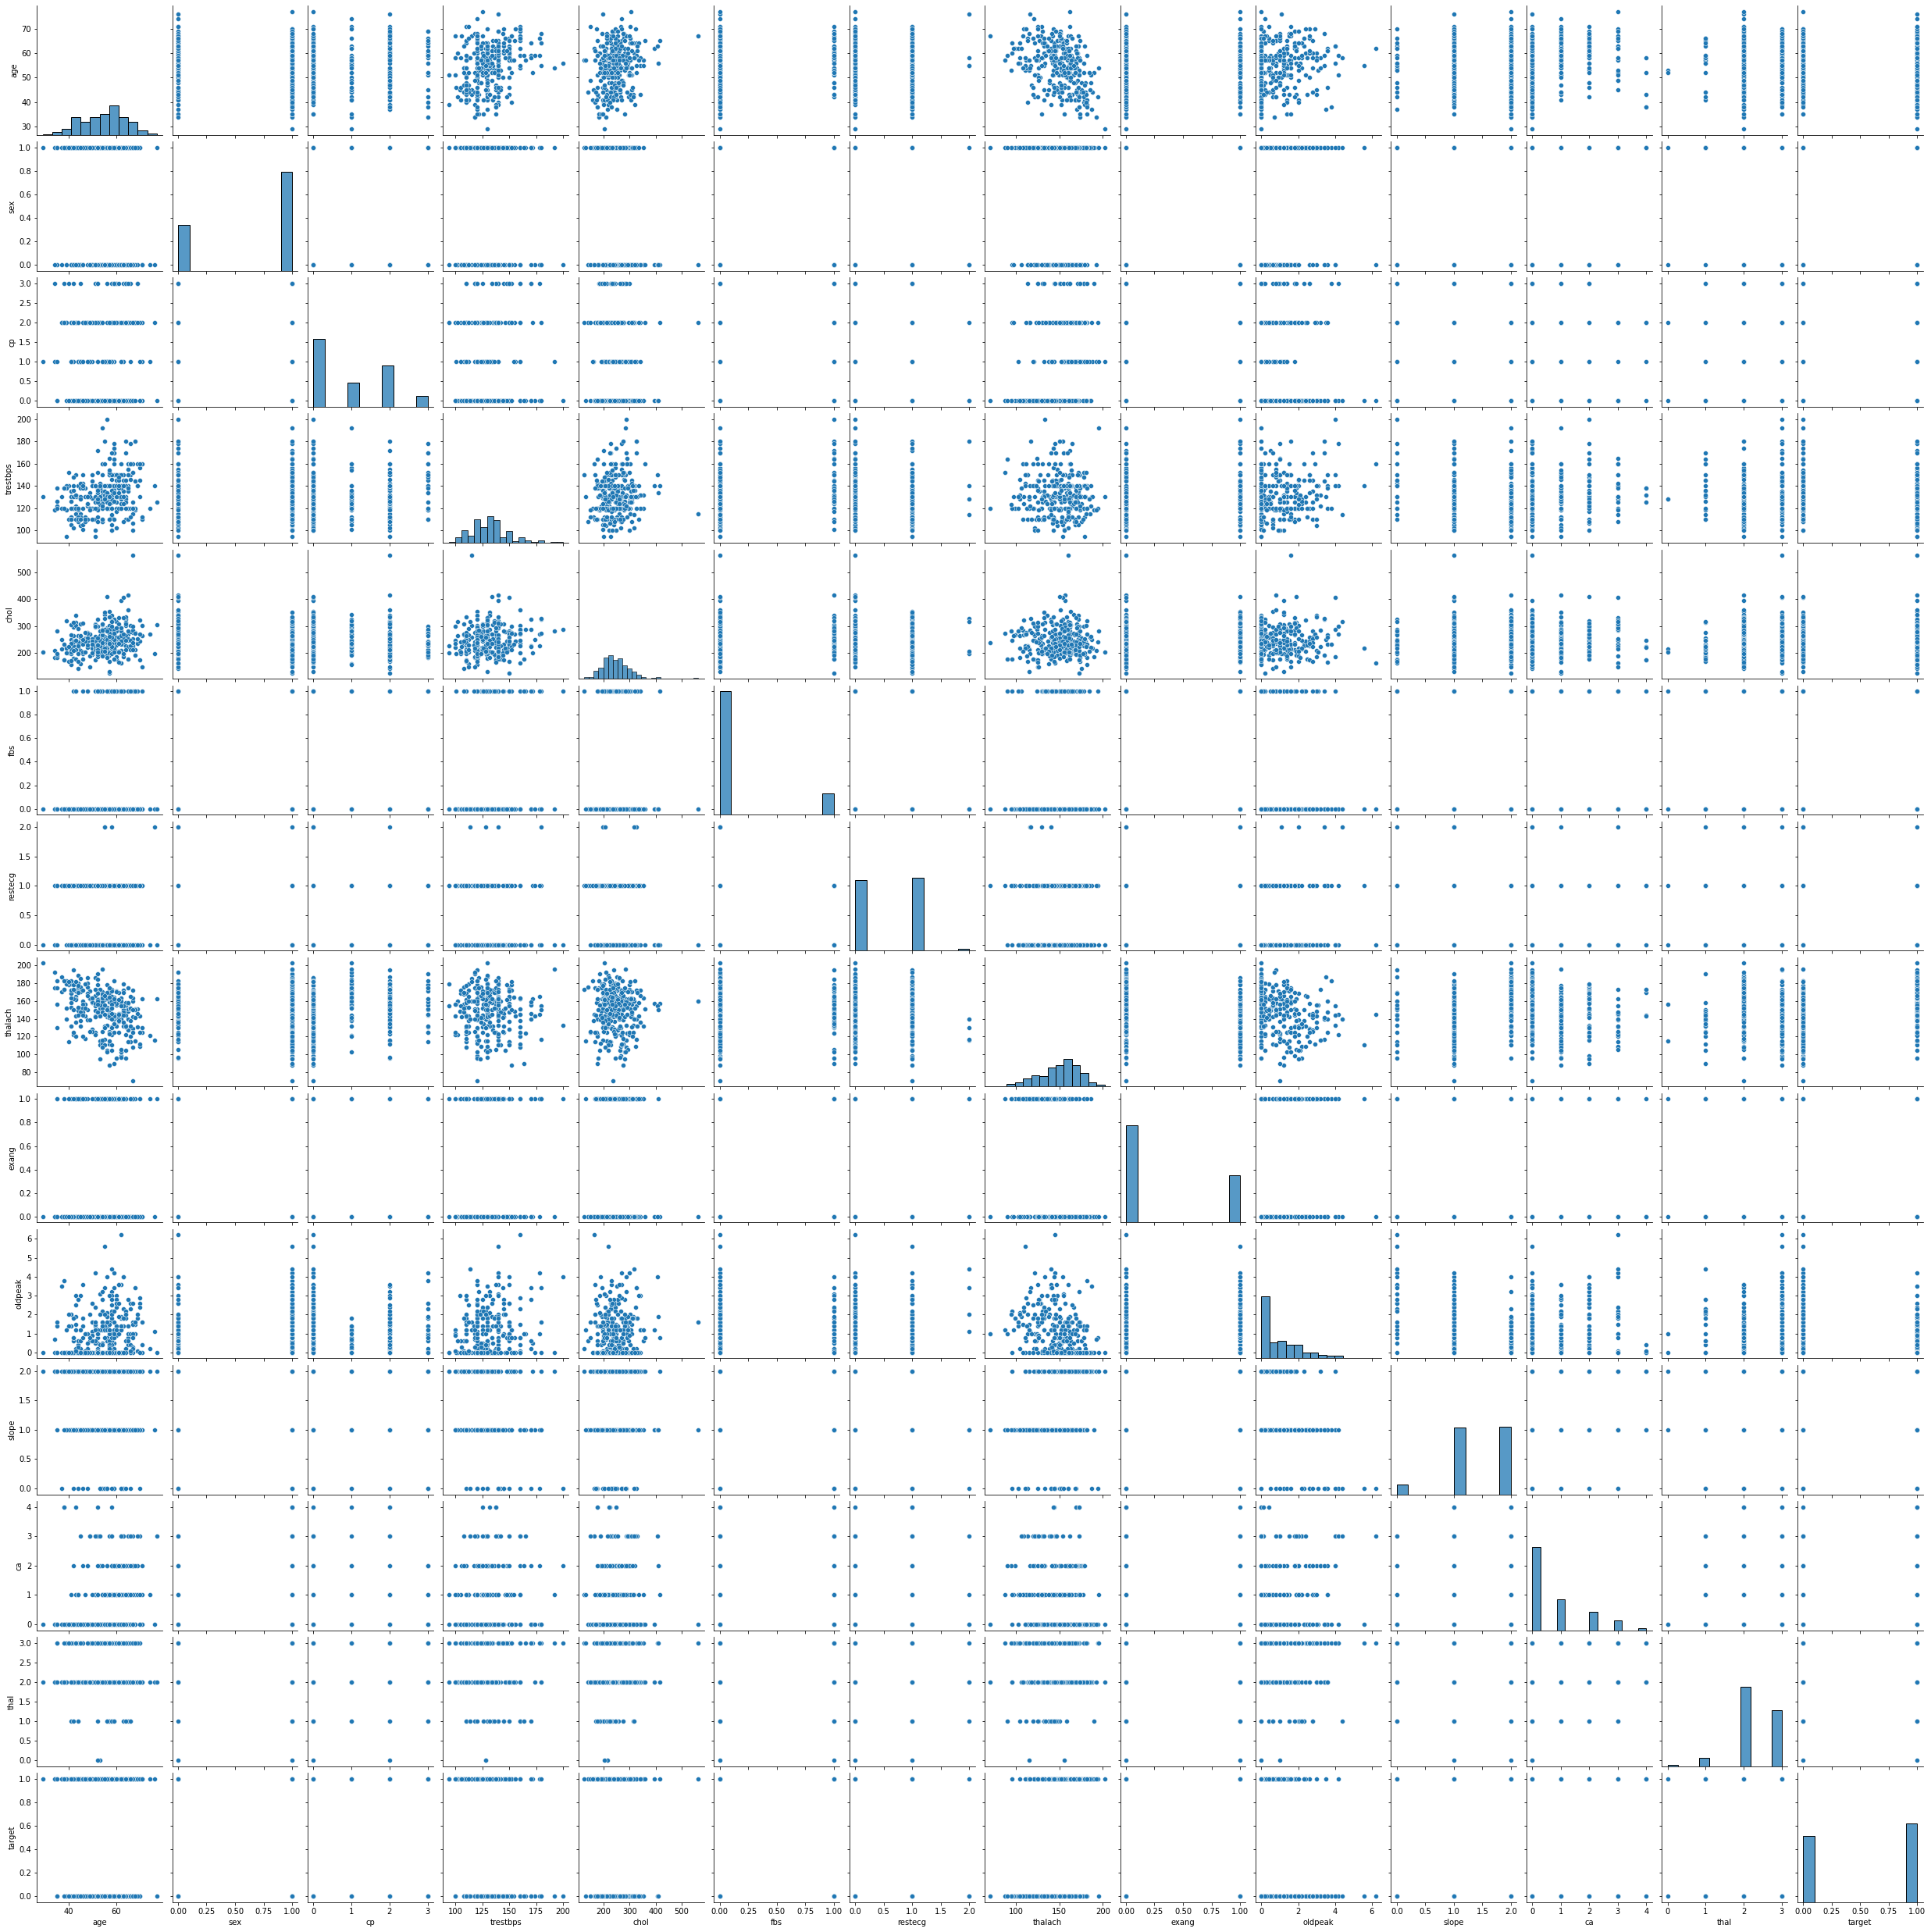

In [19]:
#Data Exploaration (EDA)
sns.pairplot(df)

In [6]:
#preparing our data for ML.
np.random.seed(42)
X = df.drop("target", axis =1)
Y = df["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =2)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(X.shape)
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(303, 13)
(303,)
(242,)
(61,)


In [8]:
#PUt models in dictionary.
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()
          }

#Create a  func to fit and score models.
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
  '''
  Fit and evaluate the machine learning models.
  models : a dict of different ML classifier models.
  X_train : Training data(no labels)
  X_test  : Testing data(no labels)
  Y_train : Training labels
  Y_test  : Test labels 
  '''
  #set random seed
  np.random.seed(42)

  #make a dict to kep models score
  model_scores = {}

  #loop through models.
  for name, model in models.items():
    #fit the data
    model.fit(X_train, Y_train)
    #Evaluate the model and append in score dict
    model_scores[name] = model.score(X_test, Y_test)
  
  return model_scores

In [9]:
model_scores = fit_and_score(models = models,
                              X_train = X_train,
                              X_test = X_test,
                              Y_train = Y_train , 
                              Y_test = Y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.7049180327868853,
 'Logistic Regression': 0.9016393442622951,
 'Random Forest Classifier': 0.9180327868852459}

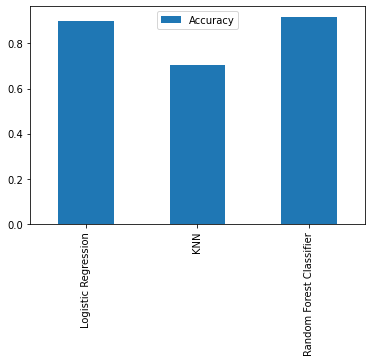

In [32]:
#Model_comparison
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar()

**Tuning Hyperparameters**Lets tune knn by hand

In [10]:

train_scores = []
test_scores = []

#Create a list of different value of neighbors
neighbors = range(1,21)
knn = KNeighborsClassifier()

#Loop through n different neighbors
for i in neighbors:
  knn.set_params(n_neighbors = i)

  #fit model
  knn.fit(X_train, Y_train)

  #Update training scores
  train_scores.append(knn.score(X_train, Y_train))

  #update test scores list
  test_scores.append(knn.score(X_test, Y_test))

train_scores

[1.0,
 0.7892561983471075,
 0.7396694214876033,
 0.7355371900826446,
 0.7396694214876033,
 0.7396694214876033,
 0.7231404958677686,
 0.7107438016528925,
 0.7066115702479339,
 0.6900826446280992,
 0.7107438016528925,
 0.6983471074380165,
 0.7066115702479339,
 0.7024793388429752,
 0.6859504132231405,
 0.6735537190082644,
 0.6900826446280992,
 0.6735537190082644,
 0.6818181818181818,
 0.6735537190082644]

In [35]:
test_scores

[0.6065573770491803,
 0.639344262295082,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885]

Maxm score is 77.05%


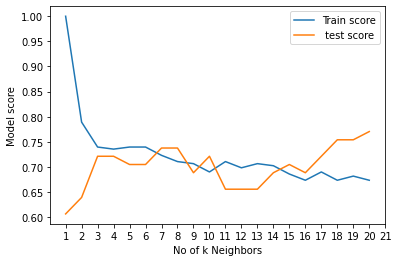

In [40]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label =" test score")
plt.xticks(np.arange(1,22))
plt.xlabel("No of k Neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maxm score is {max(test_scores)*100:.2f}%")

#HYpermeter tuning by RandoizedSearchCV
We will tune.
* LOgistic Regression
* random forest 
by this technique

In [60]:
#Create a grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]
                }

#crete a grid for random forest classifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,10,2)
}


In [43]:
#Tune Logistic Regression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv =5,
                                n_iter =20,
                                verbose = True)

#Fit random  hypermeter model for logistic
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [45]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [46]:
rs_log_reg.score(X_test,Y_test)

0.9180327868852459

In [64]:
#lets do for random forest
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid,
                                cv =5,
                                n_iter =20,
                                verbose = True)
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [65]:
rs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 810}

In [66]:
rs_rf.score(X_test, Y_test)

0.9016393442622951

###grid search hyperparameter tuning

In [15]:
np.random.seed(42)
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]
                }

gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid = log_reg_grid,
                                cv =5,
                                verbose = True)

#Fit random  hypermeter model for logistic
gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [16]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [17]:
gs_log_reg.score(X_test, Y_test)

0.9180327868852459

In [11]:
# Grid search for random forest
rf_grid = {"n_estimators": np.arange(10,100,20),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split":np.arange(2,10,2),
           "min_samples_leaf":np.arange(1,10,2)
}
np.random.seed(42)
gs_rf = GridSearchCV(RandomForestClassifier(),
                                param_grid = rf_grid,
                                cv =5,
                                
                                verbose = True)
gs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([10, 30, 50, 70, 90])},
             verbose=True)

In [13]:
gs_rf.score(X_test, Y_test)

0.8852459016393442

In [12]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 30}

In [18]:
y_pred = gs_log_reg.predict(X_test)

In [19]:
Y_test

99     1
296    0
89     1
30     1
234    0
      ..
173    0
94     1
161    1
216    0
91     1
Name: target, Length: 61, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


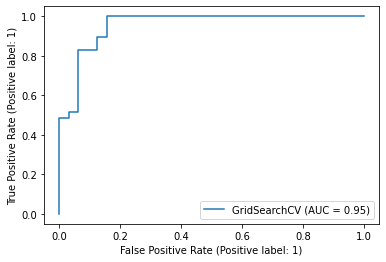

In [20]:
#Plot Roc curve
plot_roc_curve(gs_log_reg, X_test, Y_test)

In [21]:
#confusion matrix
print(confusion_matrix(Y_test, y_pred))

[[27  5]
 [ 0 29]]


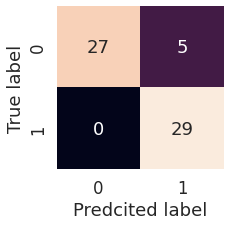

In [24]:
sns.set(font_scale = 1.5)

def plot_conf_mat(Y_test, y_pred):
  """
  Plots nice looking heatmap
  """
  fig, ax = plt.subplots(figsize = (3,3))
  ax = sns.heatmap(confusion_matrix(Y_test, y_pred),
                   annot = True,
                   cbar = False)
  plt.xlabel("Predcited label")
  plt.ylabel("True label")


plot_conf_mat(Y_test, y_pred)

In [25]:
#Classification report ads well as cross val score
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.85      1.00      0.92        29

    accuracy                           0.92        61
   macro avg       0.93      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



In [27]:
#create a new classifier with best parameter
clf = LogisticRegression(C= 0.23357214690901212,
                         solver = "liblinear")

In [32]:
#Cross val accuracy
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv = 5,
                         scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [36]:
#cross val precison
cv_precision = cross_val_score(clf,
                         X,
                         Y,
                         cv = 5,
                         scoring = "precision")
np.mean(cv_precision)

0.8215873015873015

In [38]:
#cross val recall
cv_recall = cross_val_score(clf,
                         X,
                         Y,
                         cv = 5,
                         scoring = "recall")
np.mean(cv_recall)

0.9272727272727274

In [39]:
#cross val f1 score
cv_f1 = cross_val_score(clf,
                         X,
                         Y,
                         cv = 5,
                         scoring = "f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [40]:
clf = LogisticRegression(C= 0.23357214690901212,
                         solver = "liblinear")
clf.fit(X_train, Y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [41]:
#feature importance
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.009344607637153335,
 'ca': -0.5841125616922946,
 'chol': -0.0031059731110310456,
 'cp': 0.703810486697638,
 'exang': -0.5082955534616806,
 'fbs': -0.04704670999204841,
 'oldpeak': -0.4076595160084096,
 'restecg': 0.34835393951447896,
 'sex': -0.9778588705473491,
 'slope': 0.450532214442142,
 'thal': -0.5873726345047158,
 'thalach': 0.02484814842183544,
 'trestbps': -0.013307683126008371}

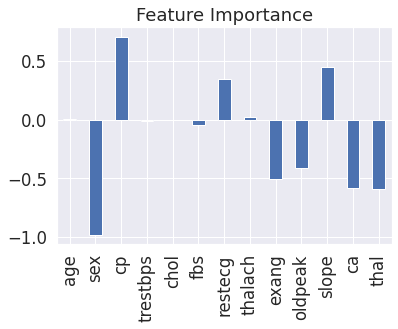

In [42]:
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title ="Feature Importance", legend = False)

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.